In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates

from datetime import datetime

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.datasets import load_iris

In [2]:
#Read xls File and Load to a dataframe

df = pd.read_excel('ClappLibraryClimate_March2015_March2020.xls')
print(df)

            Station       Date      Time  Barometric Pressure (mbar)  \
0     Clapp-Library 2015-03-01  00:00:00                      1036.0   
1     Clapp-Library 2015-03-01  00:30:00                      1035.9   
2     Clapp-Library 2015-03-01  01:00:00                      1035.7   
3     Clapp-Library 2015-03-01  01:30:00                      1035.6   
4     Clapp-Library 2015-03-01  02:00:00                      1035.5   
...             ...        ...       ...                         ...   
8923  Clapp-Library 2020-03-31  21:30:00                      1018.8   
8924  Clapp-Library 2020-03-31  22:00:00                      1018.6   
8925  Clapp-Library 2020-03-31  22:30:00                      1018.9   
8926  Clapp-Library 2020-03-31  23:00:00                      1019.0   
8927  Clapp-Library 2020-03-31  23:30:00                      1019.2   

      Air Temp (°C)  RH (%)  Dew Point (°C)  Rain (mm)  Wind Speed (m/s)  \
0             -10.4    42.0           -20.9        0.0     

In [3]:
#cooerce time stamps to str
df['Time'] = df['Time'].astype(str)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

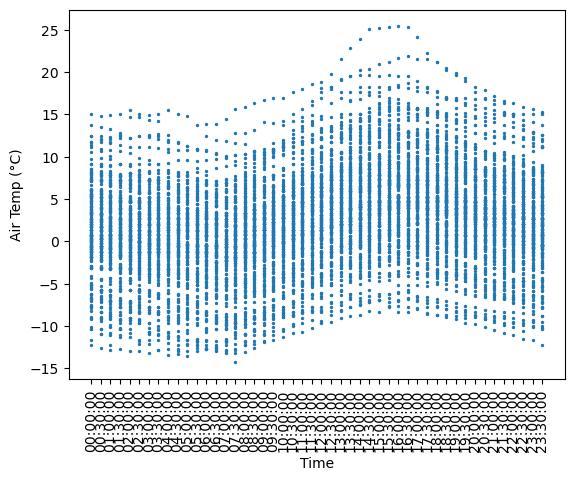

In [4]:
#plot with all the dependent and independent variables
#create x, y arrays
times = df['Time']
temp = df['Air Temp (°C)']

#draw scatter plot
plt.scatter(times, temp, s = 2)
plt.xlabel("Time")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=90)

In [5]:
#Separate years
df2015 = df[df["Date"].isin(pd.date_range("2015-03-01", "2015-03-31"))]
df2016 = df[df["Date"].isin(pd.date_range("2016-03-01", "2016-03-31"))]
df2017 = df[df["Date"].isin(pd.date_range("2017-03-01", "2017-03-31"))]
df2018 = df[df["Date"].isin(pd.date_range("2018-03-01", "2018-03-31"))]
df2019 = df[df["Date"].isin(pd.date_range("2019-03-01", "2019-03-31"))]
df2020 = df[df["Date"].isin(pd.date_range("2020-03-01", "2020-03-31"))]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

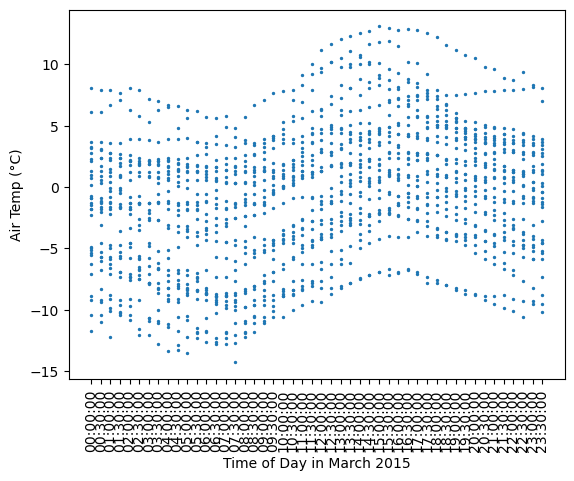

In [6]:
#plot with all the dependent and independent variables for 2015
#create x, y arrays
times2015 = df2015['Time']
temp2015 = df2015['Air Temp (°C)']

#draw scatter plot
plt.scatter(times2015, temp2015, s = 2)
plt.xlabel("Time of Day in March 2015")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

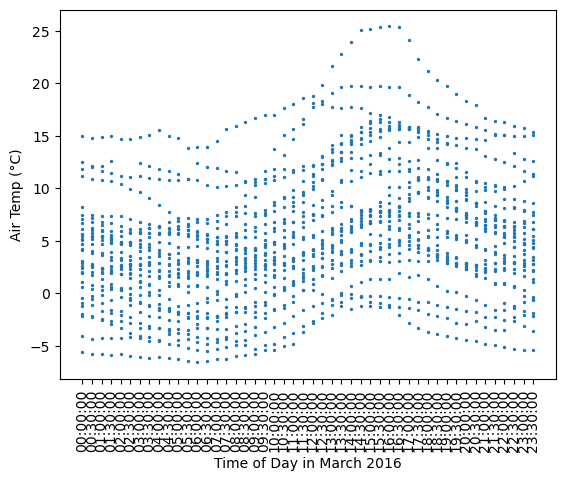

In [7]:
#plot with all the dependent and independent variables for 2016
#create x, y arrays
times2016 = df2016['Time']
temp2016 = df2016['Air Temp (°C)']

#draw scatter plot
plt.scatter(times2016, temp2016, s = 2)
plt.xlabel("Time of Day in March 2016")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

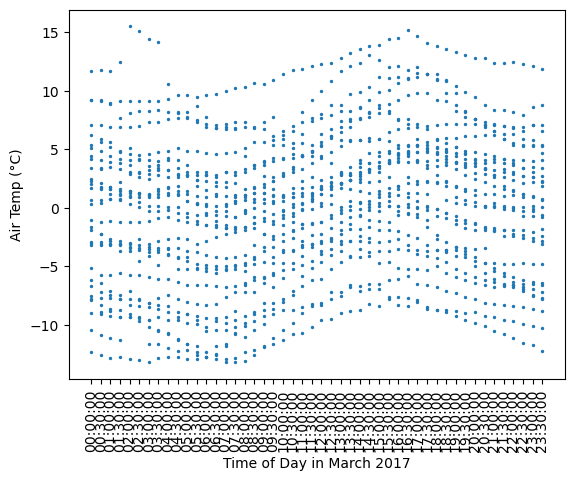

In [8]:
#plot with all the dependent and independent variables for 2017
#create x, y arrays
times2017 = df2017['Time']
temp2017 = df2017['Air Temp (°C)']

#draw scatter plot
plt.scatter(times2017, temp2017, s = 2)
plt.xlabel("Time of Day in March 2017")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

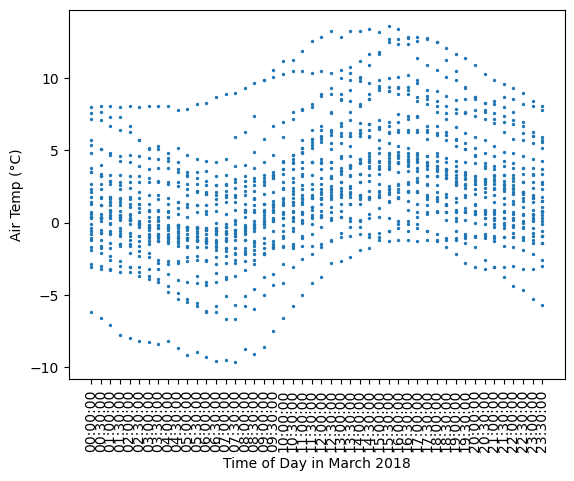

In [9]:
#plot with all the dependent and independent variables for 2018
#create x, y arrays
times2018 = df2018['Time']
temp2018 = df2018['Air Temp (°C)']

#draw scatter plot
plt.scatter(times2018, temp2018, s = 2)
plt.xlabel("Time of Day in March 2018")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

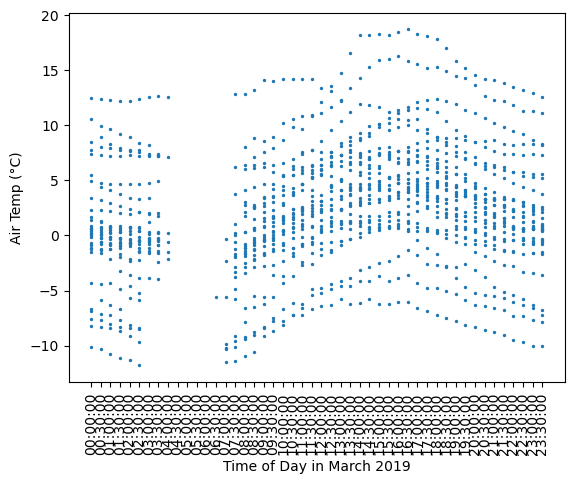

In [10]:
#plot with all the dependent and independent variables for 2019
#create x, y arrays
times2019 = df2019['Time']
temp2019 = df2019['Air Temp (°C)']

#draw scatter plot
plt.scatter(times2019, temp2019, s = 2)
plt.xlabel("Time of Day in March 2019")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

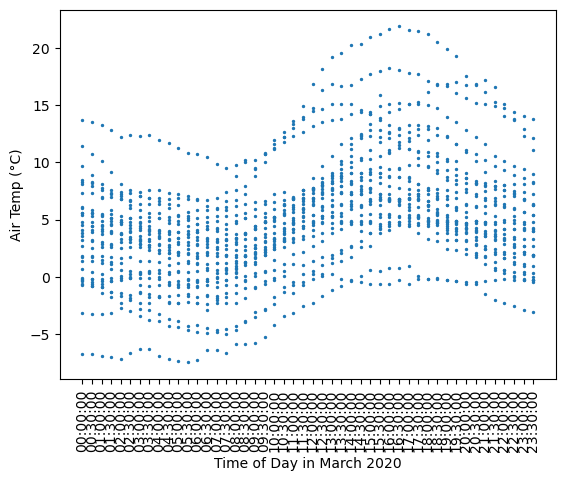

In [11]:
#plot with all the dependent and independent variables for 2020
#create x, y arrays
times2020 = df2020['Time']
temp2020 = df2020['Air Temp (°C)']

#draw scatter plot
plt.scatter(times2020, temp2020, s = 2)
plt.xlabel("Time of Day in March 2020")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=90)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

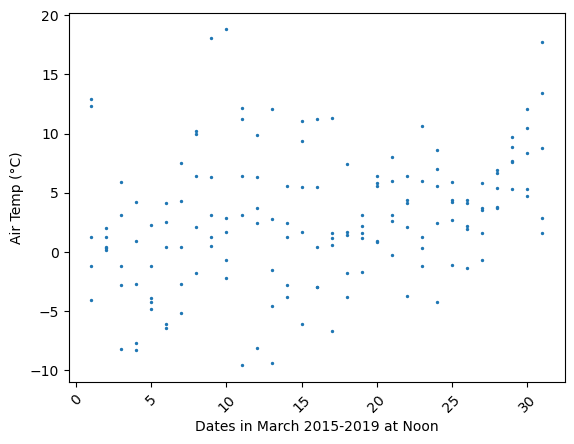

In [12]:
#Separate specific time
df2015_2019 = df[df["Date"].isin(pd.date_range("2015-03-01", "2019-03-31"))]
df15_19_noon = df2015_2019[df2015_2019["Time"]== '12:00:00']

#change dates to remove year
#print(df15_19_noon)

#Plot dates by temps for 2015
date15_19_noon = df15_19_noon['Date']
temp15_19_noon = df15_19_noon['Air Temp (°C)']

#print(date15_19_noon)
date15_19_noon = date15_19_noon.astype(str)
date15_19_noon = date15_19_noon.str.split("-").str[-1].astype(int)

#draw scatter plot
plt.scatter(date15_19_noon, temp15_19_noon, s = 2)
plt.xlabel("Dates in March 2015-2019 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)


Text(0, 0.5, 'Air Temp (°C)')

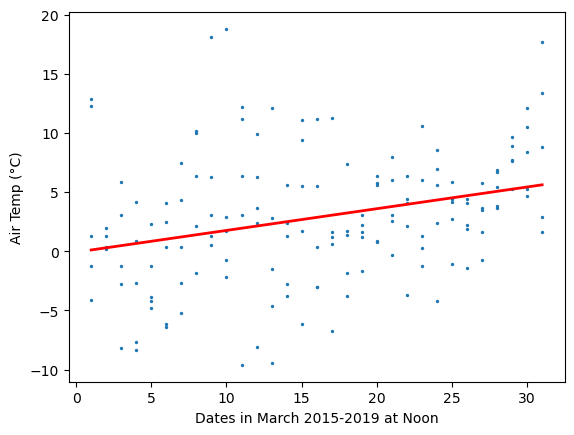

In [13]:
# plot linear regression

# convert to 2-D array
date15_19_noon = date15_19_noon.to_numpy().reshape(-1,1)
temp15_19_noon = temp15_19_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(date15_19_noon,temp15_19_noon)
temp15_19_noon_pred = model.predict(date15_19_noon)

plt.scatter(date15_19_noon,temp15_19_noon, s=2)
plt.plot(date15_19_noon, temp15_19_noon_pred, color='red', linewidth=2)
plt.xlabel("Dates in March 2015-2019 at Noon")
plt.ylabel("Air Temp (°C)")

In [14]:
# Get the model parameters
r_sq = model.score(date15_19_noon, temp15_19_noon)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.09119132483688575
intercept: [-0.06670968]
slope: [[0.18352419]]
